# Predicting Seed Type with Keras

In this notebook, I will preprocess the data. In the notebook "Neural Network", I will Keras to build an artifical neural network to predict the type of seed.

The dataset can be found in the UCI Machine Learning Repository at: https://archive.ics.uci.edu/ml/datasets/seeds

The columns are:
1. Area, A
2. Perimeter, P
3. Compactness, where C = 4*pi*A/P^2
4. Kernel Length
5. Kernel Width
6. Asymmetry Coefficient
7. Length of Kernel Groove
8. Variety of Wheat: 1=Kama, 2=Rosa, 3=Canadian

## Data Preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Create dataframe
df = pd.read_csv('seeds_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### Rename Columns

The columns names need to be updated.

In [4]:
# Update column names
df.rename(columns={0:'Area', 1:'Perimeter', 2:'Compactness', 3:'Kernel Length', 4:'Kernel Width', 
                   5:'Asymmetry Coefficient', 6:'Length of Kernel Groove', 7:'Variety of Wheat'}, inplace=True)
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Length of Kernel Groove,Variety of Wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.describe()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Length of Kernel Groove,Variety of Wheat
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
# View number of instances of each value in the Variety of Wheat column
df['Variety of Wheat'].value_counts()

1    70
2    70
3    70
Name: Variety of Wheat, dtype: int64

This dataset is balanced, with the same number of each variety of wheat. If it were imbalanced, it would be a good idea to consider various under- and over-sampling methods. For instance, Synthetic Minority Oversampling Technique (SMOTE) could be used to increase the number of instances of categories which appear less frequently.

I will plot the correlation heatmap just to get a general idea of what the correlations are for the dataset.

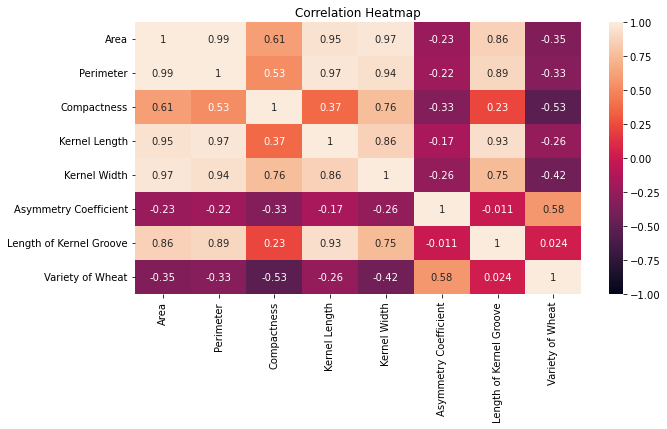

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(10,5))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

### One-Hot Encode Target

I will one-hot encode the target, so that I can use the categorical cross-entropy loss function in the neural network.

In [8]:
# Use get_dummies to encode target
df_encoded = pd.get_dummies(df, columns = ['Variety of Wheat'])
df_encoded.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Length of Kernel Groove,Variety of Wheat_1,Variety of Wheat_2,Variety of Wheat_3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0,0


### Split and Scale Data

In [9]:
# Create training and validation splits
train_data = df_encoded.sample(frac=0.7, random_state=0)
test_data = df_encoded.drop(train_data.index)

# Features need to be scaled for neural networks
scaler = MinMaxScaler()

# Fit and transform the train data using the MinMaxScaler
train_scaled = scaler.fit_transform(train_data)
# Apply the scaling to the test data
test_scaled = scaler.transform(test_data)

# Convert train_scaled and test_scaled to dataframes
train_scaled_df = pd.DataFrame(train_scaled, index=train_data.index, columns=train_data.columns)
test_scaled_df = pd.DataFrame(test_scaled, index=test_data.index, columns=test_data.columns)

# Split features and target
X_train = train_scaled_df.iloc[:,0:7]
X_valid = test_scaled_df.iloc[:,0:7]
y_train = train_scaled_df.iloc[:,7:]
y_valid = test_scaled_df.iloc[:,7:]

## Export Preprocessed Data

In [10]:
# Export preprocessed data
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_valid.to_csv('X_valid.csv', index=False)
y_valid.to_csv('y_valid.csv', index=False)